In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nistats
import json
import numpy as np
from glob import glob
import os.path as op
import pandas as pd
from nistats import hemodynamic_models

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: 

In [2]:
n_secs = 450
tr = 1.5
LEAD_IN_TIME = 6
frame_times = np.linspace(0, n_secs, int(n_secs / tr) + 1)
colors = {'motor': 'red', 'motor/auditory': 'orange', 'visual': 'green', 'visual/auditory': 'blue'}


def plot_task(task):
    config_files = sorted(glob('config/sub*_task-localizer{}_*.tsv'.format(task)))
    all_subjects = sorted(list(set([op.basename(acf).split('_')[0].split('-')[1] for acf in config_files])))
    all_sessions = sorted(list(set([op.basename(acf).split('_')[1].split('-')[1] for acf in config_files])))
    for sub in all_subjects[:6]:
        for ses in all_sessions[:1]:
            config_file = 'config/sub-{0}_ses-{1}_task-localizer{2}_run-01_config.tsv'.format(sub, ses, task)
            df = pd.read_table(config_file)

            onsets = np.cumsum(np.array(df['duration']) + np.array(df['iti']))
            onsets = np.hstack((np.array([0]), onsets[:-1]))
            df['onset'] = onsets + LEAD_IN_TIME
            
            fig, ax = plt.subplots(figsize=(16, 4))

            all_signals = []
            for ttype in df['trial_type'].unique():
                ttype_df = df.loc[df['trial_type'] == ttype]
                od = ttype_df[['onset', 'duration']].values
                oda = np.hstack((od, np.ones((od.shape[0], 1)))).T
                signal, name = hemodynamic_models.compute_regressor(
                    oda, 'spm', frame_times, con_id=ttype,
                    oversampling=16)
                signal = np.squeeze(signal)
                ax.plot(frame_times, signal, label=name[0], color=colors[name[0]])
                all_signals.append(signal)

            leg = ax.legend()
            ax.set_title('Sub {0} Session {1} {2} task'.format(sub, ses, task))
            ax.set_xlim((0, n_secs))
            fig.show()
            idx = np.triu_indices(len(all_signals), 1)
            # print(np.corrcoef(np.vstack(all_signals))[idx])

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/nistats/hemodynamic_models.py:268: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  frame_times.max() * (1 + 1. / (n - 1)), n_hr)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/nistats/hemodynamic_models.py:55: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  time_stamps = np.linspace(0, time_length, float(time_length) / dt)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


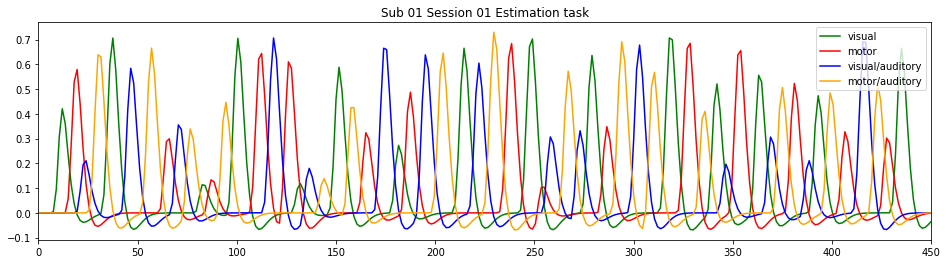

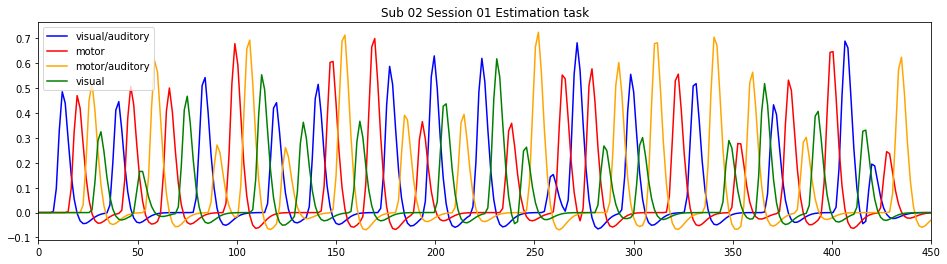

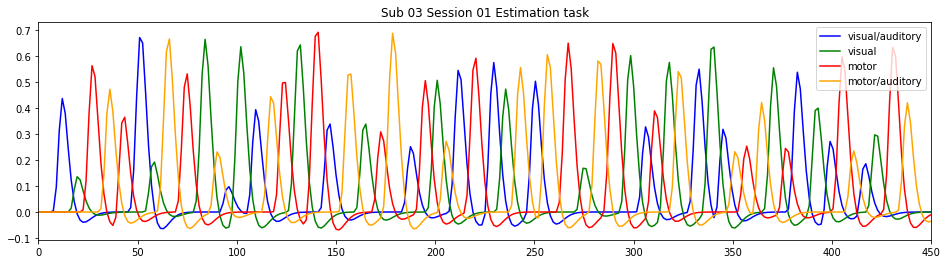

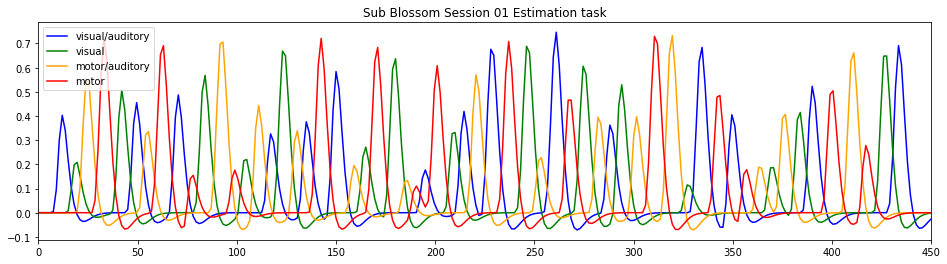

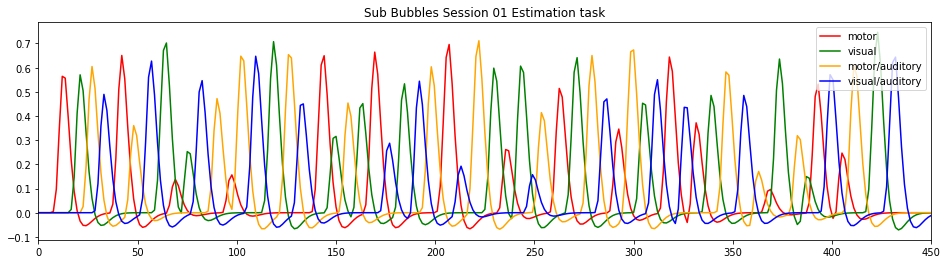

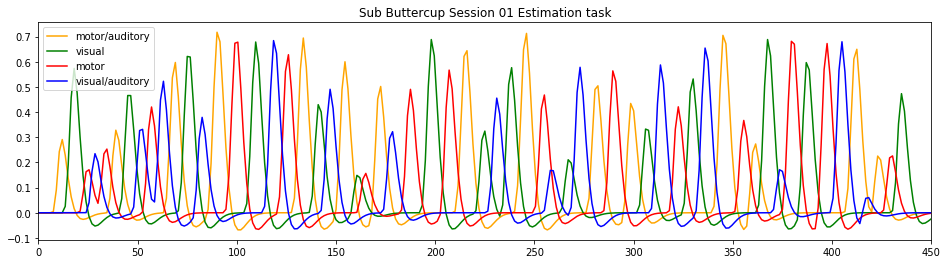

In [3]:
task = 'Estimation'
plot_task(task)

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/nistats/hemodynamic_models.py:268: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  frame_times.max() * (1 + 1. / (n - 1)), n_hr)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/nistats/hemodynamic_models.py:55: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  time_stamps = np.linspace(0, time_length, float(time_length) / dt)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


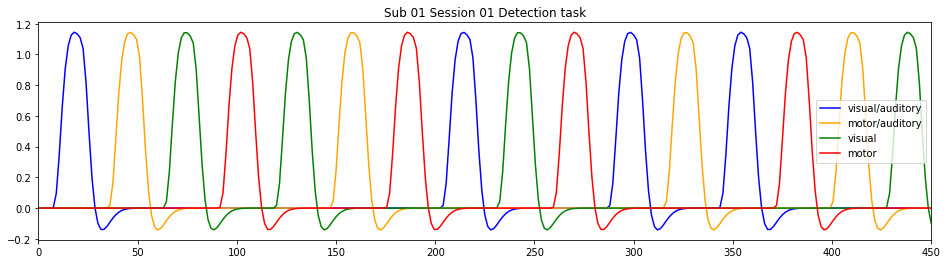

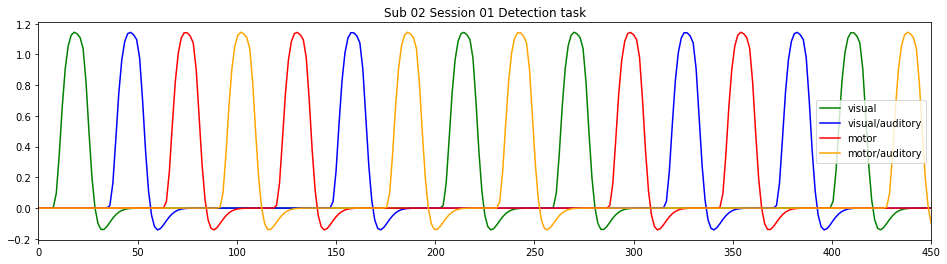

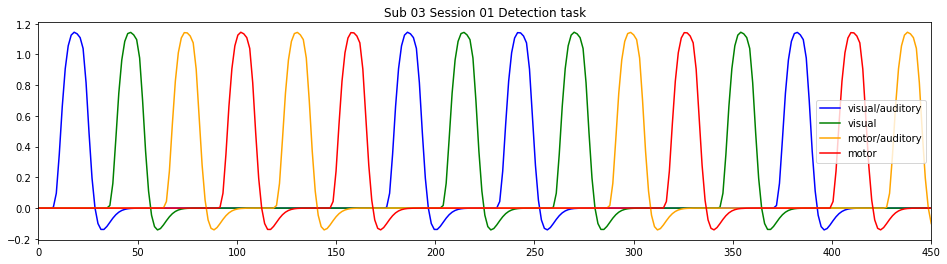

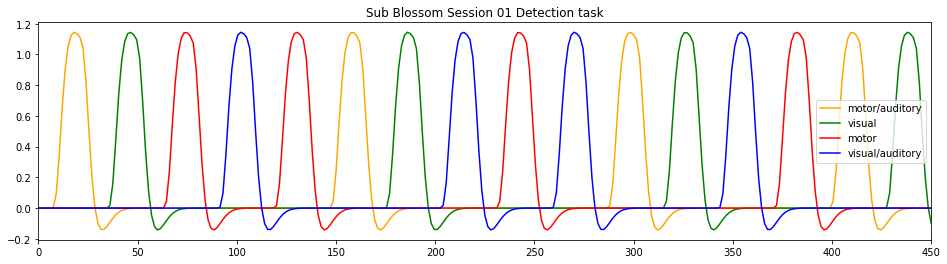

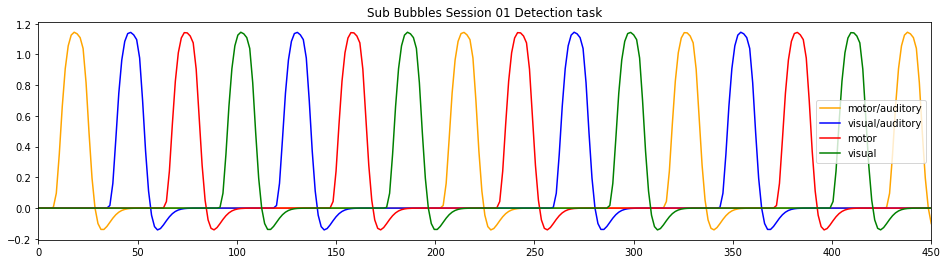

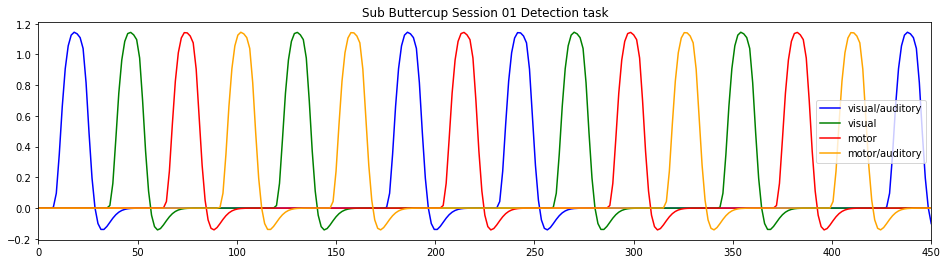

In [4]:
task = 'Detection'
plot_task(task)